# Создание дашборда по пользовательским событиям для агрегатора новостей

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цели,-задачи,техническое-задание,-план-проекта:" data-toc-modified-id="Цели,-задачи,техническое-задание,-план-проекта:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цели, задачи,техническое задание, план проекта:</a></span></li><li><span><a href="#Коннекция-к-базе,-изучение-и-предобработка-датасета" data-toc-modified-id="Коннекция-к-базе,-изучение-и-предобработка-датасета-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Коннекция к базе, изучение и предобработка датасета</a></span></li><li><span><a href="#Дашборд" data-toc-modified-id="Дашборд-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Дашборд</a></span></li><li><span><a href="#Ответы-на-вопросы-менеджеров" data-toc-modified-id="Ответы-на-вопросы-менеджеров-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ответы на вопросы менеджеров</a></span></li><li><span><a href="#Презентация" data-toc-modified-id="Презентация-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Презентация</a></span></li></ul></div>

###  Цели, задачи,техническое задание, план проекта:

Цель:  Разработать дашборд на основе технического задания.  
Задачи:  
- открыть файл, изучить и подготовить данные
- в Tableau Public на основе файла dash_visits.csv  сформировать дашборд в соответствии с макетом;
- Опубликовать дашборд на сайте Tableau Public  
- Ответить на вопросы менеджеров, используя дашборд:   
Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?  
Как много карточек генерируют источники с разными темами?  
Как соотносятся темы карточек и темы источников?  

Техническое задание :  
  
  Бизнес-задача: анализ взаимодействия пользователей с карточками Дзена;  
  Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;  
  Кто будет основным пользователем дашборда: менеджеры по анализу контента;  

  
Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):  
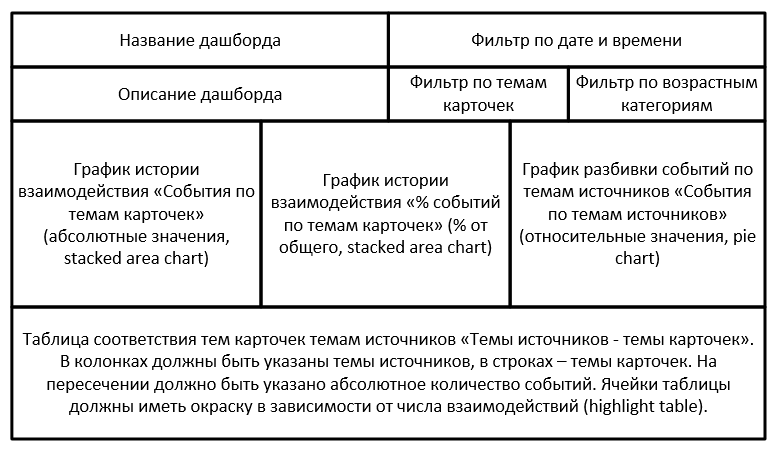

- Навыки:   jupiter notebook, Python, Tableau, продуктовые метрики, построение дашбордов 
 
- Ключевые слова:  bi analyst, bi-аналитик, аналитик данных, data analyst, разработчик системы отчетности, reporting analyst, дашборд, визуализация данных, Tableau.
 
 - Сферы: Стартапы.

### Коннекция к базе, изучение и предобработка датасета

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 

In [2]:
query = '''SELECT * FROM dash_visits'''

In [3]:
data = pd.io.sql.read_sql(query, con = engine) 
data.head()

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


In [4]:
# изучим общую информацию из таблицы
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


In [5]:
#просчет пропусков
data.isna().sum()

record_id       0
item_topic      0
source_topic    0
age_segment     0
dt              0
visits          0
dtype: int64

In [6]:
#Подсчитаем количество дибликатов
print(f'Количество дибликатов в  таблице data {data.duplicated().sum()}')

Количество дибликатов в  таблице data 0


В таблице 30745 значений, все типы данных в правильном формате , нет пропусков и дубликатов

In [7]:
# максимальная дата
# минимальная дата
max_date = data['dt'].max()
min_date = data['dt'].min()
print (f' Максимальная дата в столбце {max_date} , минимальная дата с столбце {min_date}')

 Максимальная дата в столбце 2019-09-24 19:00:00 , минимальная дата с столбце 2019-09-24 18:28:00


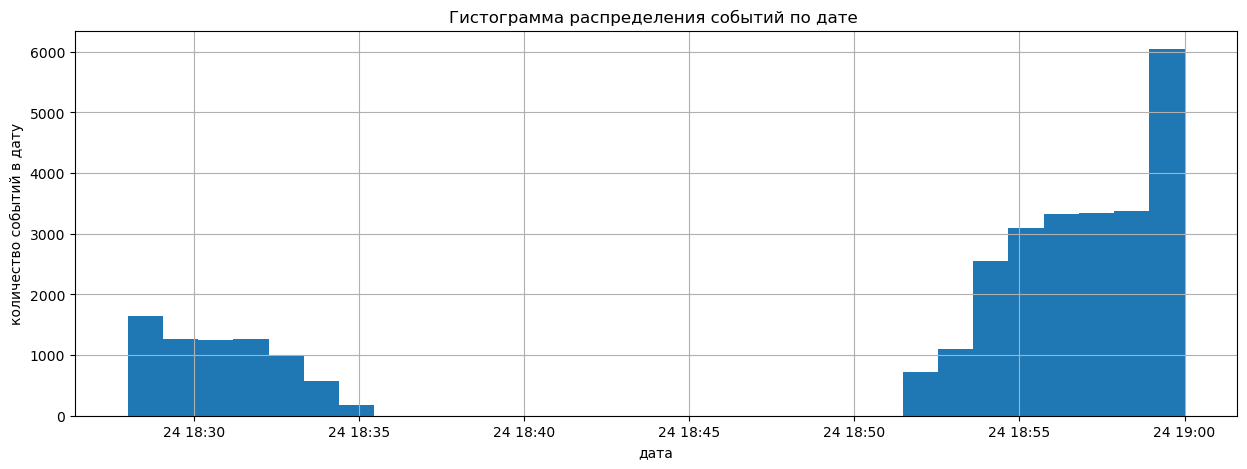

In [8]:
# гистограмма по дате и времени
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 5))
data['dt'].hist(bins=30)
plt.title('Гистограмма распределения событий по дате ')
#plt.ylim(0,100)
plt.xlabel('дата')
plt.ylabel('количество событий в дату')
plt.show()

In [9]:
#ознакомимся с уникальными значениями колонок c типом object
for column in ['item_topic','source_topic','age_segment']:
    print(data[column].value_counts())

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64
Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              12

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


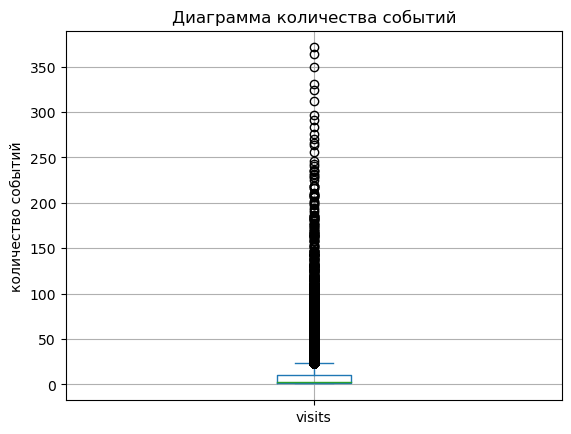

In [11]:
data.plot(
kind='box',
y='visits', 
grid=True,
legend=True )
plt.title('Диаграмма количества событий')
plt.xlabel('')
plt.ylabel('количество событий')
plt.show()

По графику видно, что в основном, событий до 25,но есть и большие значения, каких-то аномалий не выявлено

In [12]:
# сохраним датафрейм в виде файла
data.to_csv('data.csv', index= False)

### Дашборд

<https://public.tableau.com/app/profile/varvara.mambetova/viz/_16881923454090/sheet4>

### Ответы на вопросы менеджеров

   Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?  

   Как много карточек генерируют источники с разными темами?  
  
   Как соотносятся темы карточек и темы источников?  
  
1. Больше всего взаимодействий пользователей с карточками происходит по темам карточек топ- 5: наука отношения, интересные факты, общество, подборки.Количество взаимодействия представлено на 1 и 2 графике.  
2. Количество карточек по разным темам представлено на 2 графике, топ-5 Семейные отношения 33309, Россия 29831, Полезные советы 27412, Путешествия 24124. знаменитости 23945  
3. Соотношение тем источников и карточек представлено в таблице. Топ 5 по соотношению тем источников и тем карточек : Путешествия - рассказы, Россия- Общество, Кино-Наука, Россия-Россия,Полезные советы-Подборки

### Презентация

<https://drive.google.com/file/d/1otV6qoVnJUdxN45iDnlKlQGNT6q5MUmo/view?usp=sharing>